## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
import pickle
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


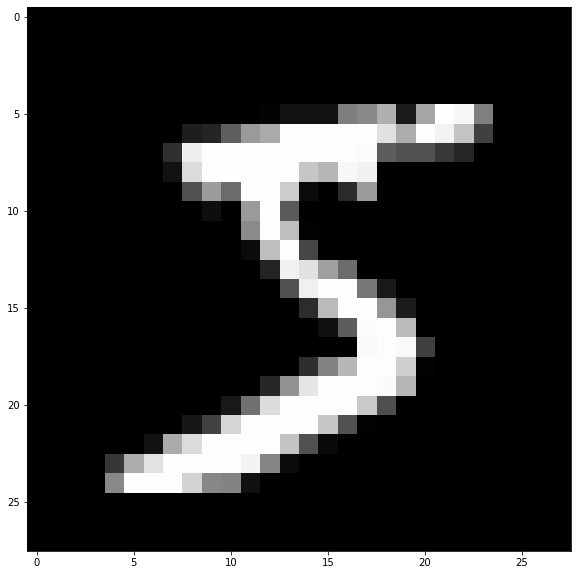

In [4]:
plt.imshow(x_train[0], cmap='gray')

## Helper Methods

### Print grid of images from data

In [5]:
def printGrid(data, m, n) :
    for ind, i in enumerate(data):
        ax = plt.subplot(m, n, ind+1)
        plt.imshow(i, cmap="gray")
    plt.show()

def printGridSlice(data, m, n) :
    l = (m*n)
    for i in range(l) :
        ax = plt.subplot(m, n, i+1)
        plt.imshow(data[i], cmap="gray")
    plt.show()

### Generate Filtered dataset for particular Class and Limit the number

In [6]:
def filterAndLimit(target, limit, datax , datay) :
    count = 0
    i = 0
    x = []
    y = []
    if limit==-1 :
        limit = len(datax)
    while(count<limit and i<limit) :
        if target==datay[i] :
            x.append(datax[i])
            y.append(datay[i])
            count += 1
        i += 1
    
    return x,y,count

### Rotate image randomly in any 4 orientations

Degrees in clockwise

- 0 : 0   deg
- 1 : 90  deg
- 2 : 180 deg
- 3 : 270 deg

In [7]:
def getRandomOrientationData(data, counts = None) :
    res = []
    y = []
    l = len(data)
    if not counts : 
        counts = []
        for i in range(4) :
            counts.append(l//4)
    
    assert sum(counts) <= l
            
    for im in data:
        orientation = random.randint(0, 3)
        res.append(np.rot90(im, orientation, (1, 0)))
        y.append(orientation)
    
    return res, y, counts

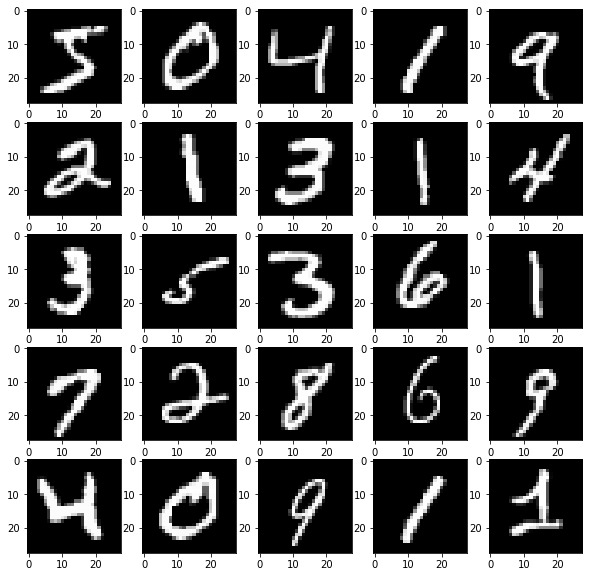

In [8]:
printGrid(x_train[:25], 5, 5)

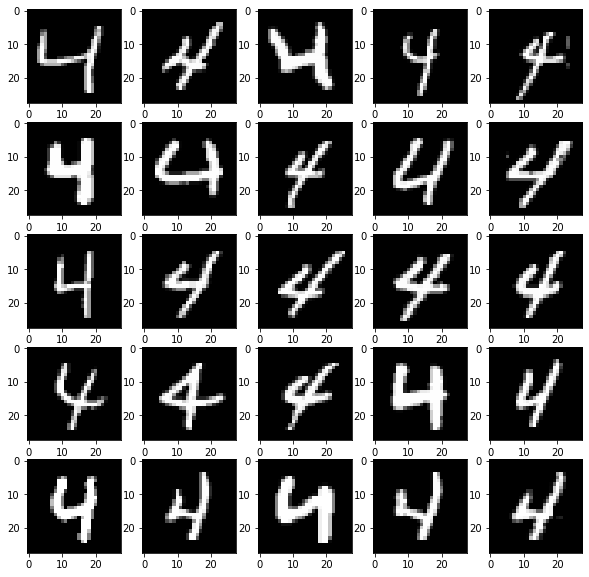

In [9]:
x4, y4, count = filterAndLimit(4, 500, x_train, y_train)
printGrid(x4[:25], 5, 5)

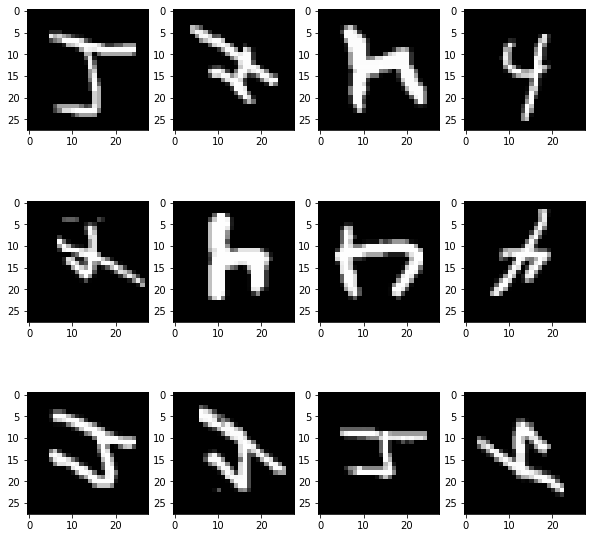

[3, 3, 2, 0, 3, 2, 2, 2, 3, 3, 3, 1]


In [10]:
xr4,yr4,counts = getRandomOrientationData(x4)
printGrid(xr4[:12], 3, 4)
print(yr4[:12])

### Generator pipeline

In [11]:
def getDataset(datax, datay, target, limit=-1, counts=None, plotDemo=None) :
    x,y,count = filterAndLimit(target, limit, datax, datay)
    x,y,counts = getRandomOrientationData(x, counts)
    if plotDemo : 
        printGridSlice(x, *plotDemo)
    return x,y,counts

In [12]:
class Dataset : 
    def __init__(self, x = [], y = [], counts = [0, 0, 0, 0]) :
        self.x = x
        self.y = y
        self.length = len(x)
        self.distribution = counts
    
    def save(self, filename) :
        with open(f'{filename}.pickle', 'wb') as handle:
            pickle.dump(self, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    def load(self, filename) :
        with open(f'{filename}.pickle', 'rb') as handle:
            b = pickle.load(handle)
            self.x = b.x
            self.y = b.y
            self.length = len(b.x)
            self.distribution = b.distribution
    
    def printSlice(self, m, n) :
        assert m*n <= self.length
        for i in range(m*n) :
            ax = plt.subplot(m, n, i+1)
            plt.imshow(self.x[i], cmap="gray")
        plt.show()
        print(self.y[:m*n])
    
    def plotDist(self) :
        plt.hist(self.y)
        plt.show()

## Usage

In [13]:
f_name = "sampleDataset"

### Saving a dataset

5842
5842
[1460, 1460, 1460, 1460]


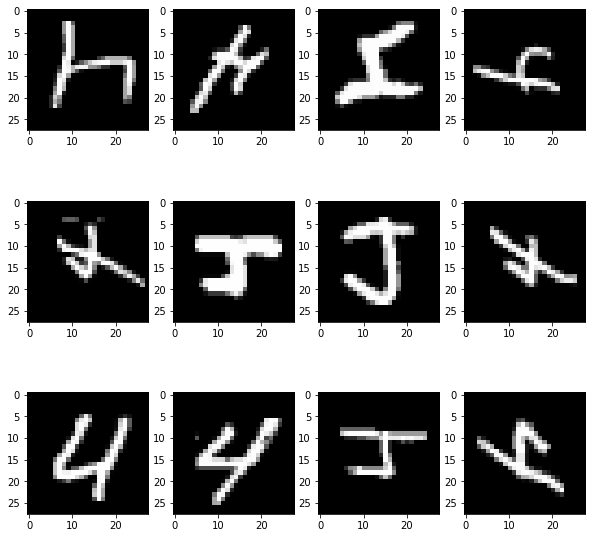

[2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 3, 1]


In [14]:
x, y, counts = getDataset(x_train, y_train, 4)
d = Dataset(x, y, counts)
d.save(f_name)
print(len(d.x))
print(len(d.y))
print(d.distribution)
d.printSlice(3, 4)

### Loading the dataset and testing

In [15]:
ld = Dataset()
ld.load(f_name)

5842
5842
[1460, 1460, 1460, 1460]


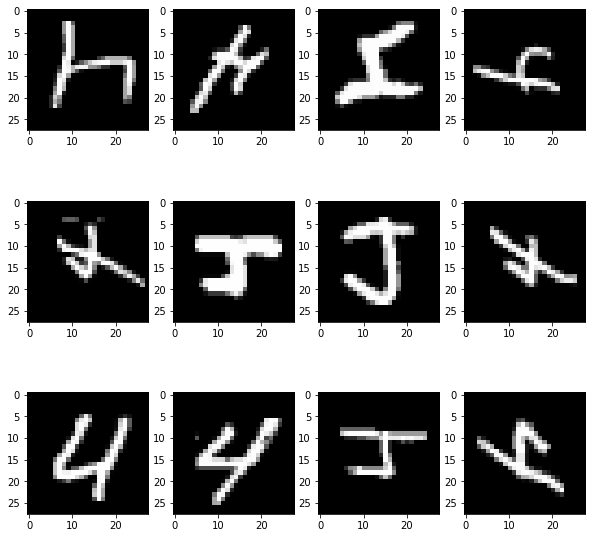

[2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 3, 1]


In [16]:
print(len(ld.x))
print(len(ld.y))
print(ld.distribution)
ld.printSlice(3, 4)

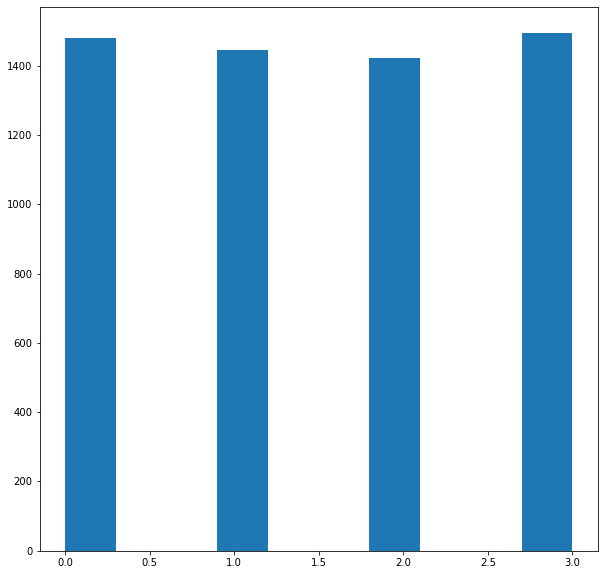

In [17]:
ld.plotDist()